# <center>Exploratory Data Analysis of Mobile Strategy Games</center>

## Table of Contents

* [1. Introduction](#introduction)
* [2. Ask](#ask)
    * [2.1 The business task](#business_task)
    * [2.2 Key stakeholders](#key_stakeholder)
* [3. Prepare](#prepare)
    * [3.1 Data used](#data_used) 
    * [3.2 Importing the data](#importing) 
    * [3.3 Exploring the data](#exploring)
* [4. Process](#process)
* [5. Analyze and Share](#analyze)
    * [Question 1: What kind of strategy games are the most?](#Question-1:-What-kind-of-strategy-games-are-the-most?)
    * [Question 2: What kind of strategy games have the highest price?](#Question-2:-What-kind-of-strategy-games-have-the-highest-price?)
    * [Question 3: What kind of strategy games have the highest rating?](#Question-3:-What-kind-of-strategy-games-have-the-highest-rating?)
    * [Question 4: Who are the main competitors?](#Question-4:-Who-are-the-main-competitors?)
* [6. Summary & Recommendations](#summary)

<a id="introduction"></a>
## 1. Introduction

In this project, we'll pretend there is a fictional company called Gamemagician that develops mobile game apps. Gamemagician decides to create an app that focus on **Strategy Games**. We are hired as data analysts to do an exploratory data analysis, to help them get familiar with the current market and provide some suggestions.

<a id="ask"></a>
## 2. Ask

<a id="business_task"></a>
### 2.1 The business task

As data analysts, we need to analyze the strategy games based on the following sections:
- Classifications
- Price
- User Ratings
- Competitors

Finally, we will provide recommendations about what kind of strategy games Gamemagician should create. Our report should be backed up with compelling data insights and professional data visualizations.

<a id="key_stakeholder"></a>
### 2.2 Key stakeholders

- **The analytics team we are working for**: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Gamemagician marketing strategy.
- **Gamemagician executive team**: The executive team of our client, Gamemagician. They are detail-oriented and will decide whether to approve our recommendations.


<a id="prepare"></a>
## 3. Prepare
<a id="data_used"></a>
### 3.1 Data used

We're going to use the [17K Mobile Strategy Games dataset](https://www.kaggle.com/datasets/tristan581/17k-apple-app-store-strategy-games?select=appstore_games.csv) found in Kaggle. It's the data of 17007 strategy games on the Apple App Store, collected on Aug 03, 2019, using the iTunes API and the [App Store Sitemap](https://apps.apple.com/us/genre/ios-games/id6014).

<a id="importing"></a>
### 3.2 Importing the data

We need to download and import the csv file `appstore_games.csv` from the kaggle link.

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
mpl.rcParams['figure.dpi']= 200

# set seaborn theme
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 
                 "figure.dpi":100, 'savefig.dpi':100}
sns.set_theme(style="ticks", rc=custom_params)
%config InlineBackend.figure_format = "retina"

# read the csv
games = pd.read_csv("data/appstore_games.csv")

# check first 5 rows
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


<a id="exploring"></a>
### 3.3 Exploring the data

#### Data size

In [2]:
# data size
games.shape

(17007, 18)

#### Find duplicates

In [3]:
games[games.duplicated(keep=False)]

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
15,https://apps.apple.com/us/app/awele-oware-manc...,289217958,Awele/Oware - Mancala HD,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.0,112.0,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.0,Games,"Games, Strategy, Board",31/08/2008,6/04/2015
16,https://apps.apple.com/us/app/awele-oware-manc...,289217958,Awele/Oware - Mancala HD,NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.0,112.0,0.00,0.99,Awele/Oware is the oldest African board game a...,SOLILAB,4+,"EN, FR, DE, IT, ES",122826752.0,Games,"Games, Strategy, Board",31/08/2008,6/04/2015
56,https://apps.apple.com/us/app/shogi-kifu/id302...,302532668,Shogi Kifu,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,Games,"Games, Strategy, Board",14/07/2011,13/10/2018
57,https://apps.apple.com/us/app/shogi-kifu/id302...,302532668,Shogi Kifu,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,3.99,NaN,This application is to record Shogi (Japanese ...,Yoshikazu Kakinoki,4+,"EN, JA",29797376.0,Games,"Games, Strategy, Board",14/07/2011,13/10/2018
123,https://apps.apple.com/us/app/checkers/id32102...,321026028,Checkers,Checkers (Draughts) & puzzles.,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,36581.0,0.00,NaN,"Checkers (also called ""Draughts"") is challengi...",Vintolo Ltd,4+,EN,69393408.0,Games,"Games, Entertainment, Board, Strategy",4/07/2009,14/06/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16513,https://apps.apple.com/us/app/fire-boy-water-g...,1460730256,Fire Boy - Water Girl,"Run, jump & hop on platforms",https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,Start your island world adventure with the cra...,GUENNOUNI Othmane,4+,EN,171115520.0,Games,"Games, Adventure, Strategy, Entertainment",26/04/2019,29/06/2019
16560,https://apps.apple.com/us/app/kiloton/id146259...,1462595486,Kiloton,Intelligence Learning Lab,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""KILOTON is a logic puzzle game, in the vein o...",V. Kevin Russ,4+,EN,80356352.0,Games,"Games, Strategy, Puzzle",10/05/2019,20/05/2019
16561,https://apps.apple.com/us/app/kiloton/id146259...,1462595486,Kiloton,Intelligence Learning Lab,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"""KILOTON is a logic puzzle game, in the vein o...",V. Kevin Russ,4+,EN,80356352.0,Games,"Games, Strategy, Puzzle",10/05/2019,20/05/2019
16564,https://apps.apple.com/us/app/idle-bomber-idle...,1462678041,Idle Bomber - Idle & Clicker,Boom Boom Boom,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,1.99,Boom! Boom! Boom!\n\nIdle Bomber - Idle & Clic...,Rafael Sian de Freitas,4+,EN,113328128.0,Games,"Games, Strategy, Casual",8/05/2019,15/06/2019


Duplicates exist, we need to remove them later.

#### Check missing values

In [4]:
# get the type and count of missing values of each column 
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17007 entries, 0 to 17006
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   URL                           17007 non-null  object 
 1   ID                            17007 non-null  int64  
 2   Name                          17007 non-null  object 
 3   Subtitle                      5261 non-null   object 
 4   Icon URL                      17007 non-null  object 
 5   Average User Rating           7561 non-null   float64
 6   User Rating Count             7561 non-null   float64
 7   Price                         16983 non-null  float64
 8   In-app Purchases              7683 non-null   object 
 9   Description                   17007 non-null  object 
 10  Developer                     17007 non-null  object 
 11  Age Rating                    17007 non-null  object 
 12  Languages                     16947 non-null  object 
 13  S

What we can learn:

- There are some columns with plenty of missing values. Among them, we don't care about `URL` and `Icon URL`. `ID` and `Subtitle` is not important since we've known the name and genres of the game. We can drop those columns later.

- Rating related columns like `Average User Rating` and `User Rating Count` are critical, we will remove those rows without ratings.

- Given such large value of `Size` and randomly checking some apps on app store, we can know the unit of `Size` should be bytes. To make it more readable, we will need to convert it to MB.

- `Primary Genre` of the first 5 rows are all "Games", but we need to take care if it's not.

- `Genres` consist of multiple genre string, it contains the primary genre "Game", but other than "Strategy", it also contains genres like "Board", "Puzzle", etc., we need to deal with that later.

- `Original Release Date` and `Current Version Release Date` are objects, but what types of objects? String or datetime?

First of all, let's check the unique values of `Primary Genre`

In [5]:
games['Primary Genre'].unique()

array(['Games', 'Entertainment', 'Finance', 'Sports', 'Reference',
       'Medical', 'Education', 'Utilities', 'Book', 'Travel',
       'Productivity', 'Lifestyle', 'Business', 'News',
       'Social Networking', 'Health & Fitness', 'Music', 'Stickers',
       'Food & Drink', 'Shopping', 'Navigation'], dtype=object)

Some apps are not "Games", or at least not pure games. What are they?

In [6]:
# randomly check 10 apps that are not games
games[games['Primary Genre'] != "Games"].sample(5, random_state=1)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
1213,https://apps.apple.com/us/app/rock-paper-sciss...,509936274,"Rock, Paper, Scissors!!!",NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,NaN,"The game we know today as ""Rock, Paper, Scisso...",Limpossible Technologies,4+,"EN, ES",1617130.0,Entertainment,"Entertainment, Simulation, Strategy, Games",19/03/2012,29/06/2012
1234,https://apps.apple.com/us/app/hangman-en/id511...,511938214,Hangman EN,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,1.99,Hangman - Search the word!\n\nHangman - The cl...,Dominik Walleser,4+,"CS, NL, EN, FR, DE, IT, JA, KO, PL, PT, RU, ZH...",38514688.0,Entertainment,"Entertainment, Word, Games, Strategy",26/03/2012,23/07/2015
5236,https://apps.apple.com/us/app/hacker-tanks/id9...,955093715,Hacker Tanks,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.00,"0.99, 2.99, 7.99, 29.99, 49.99, 99.99, 0.99, 4...",Release Your Hacker Skills!!\n\nHave you ever ...,Koichi Ishida,4+,EN,59027456.0,Education,"Education, Strategy, Games",25/01/2015,25/01/2015
15599,https://apps.apple.com/us/app/letscode/id14437...,1443741838,LetsCode,Strengthen your child\u2019s logic,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,9.99,NaN,Let\u2019s Code is the newest fun game which w...,Anurag Rastogi,4+,"AR, HY, CA, CS, DA, NL, EN, FI, FR, DE, EL, HE...",139212800.0,Education,"Education, Games, Strategy, Puzzle",31/12/2018,31/12/2018
201,https://apps.apple.com/us/app/pok%C3%A9-dexter...,339451567,Pok\xe9 Dexter - Generation I to VI,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.0,1471.0,0.99,NaN,"Novices and experts Pok\xe9mon, this new Pok\x...",iVenus,4+,"EN, FR",331237376.0,Reference,"Reference, Games, Strategy, Adventure",25/11/2009,21/09/2015


Those apps' primary goals are not being game apps, eventhough they can play like games. Therefore, we will remove those apps from our dataframe.

Next, let's take a closer look at `Genres`.

In [7]:
# get all unique genres
genres = games['Genres'].str.split(',', expand=True).stack().str.strip()
genres.unique()

array(['Games', 'Strategy', 'Puzzle', 'Board', 'Education',
       'Entertainment', 'Casual', 'Action', 'Card', 'Simulation',
       'Finance', 'Word', 'Role Playing', 'Sports', 'Adventure', 'Family',
       'Travel', 'Casino', 'Business', 'Navigation', 'Reference',
       'Lifestyle', 'Social Networking', 'Medical', 'Utilities', 'Trivia',
       'Racing', 'Books', 'Music', 'Productivity', 'Health & Fitness',
       'Food & Drink', 'News', 'Photo & Video', 'Stickers',
       'Emoji & Expressions', 'Sports & Activities', 'Gaming',
       'Comics & Cartoons', 'Animals & Nature', 'People', 'Shopping',
       'Kids & Family', 'Art', 'Places & Objects', 'Weather',
       'Magazines & Newspapers'], dtype=object)

Some genres like "Finance", "News", "Weather", etc., are obviously not game apps. Does that mean the dataset is incorrect?
Let's check some of them:

In [8]:
games[games['Genres'].str.contains('Finance|News|Weather')].sample(9, random_state=1)

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
7196,https://apps.apple.com/us/app/e-play-online/id...,1053445072,E-PLAY online,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,E-PLAY Online to wszechstronna aplikacja media...,E-Play,17+,"EN, PL",17842176.0,Games,"Games, Strategy, News, Casino",22/11/2015,22/11/2015
13576,https://apps.apple.com/us/app/gazua-cryptocurr...,1340419209,GAZUA-Cryptocurrency Simulator,Cryptocurrency Simulator,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,"0.99, 3.99, 7.99, 39.99, 89.99",Cryptocurrency Trading Online Simulator Game!\...,ho seok Bang,4+,EN,129117184.0,Games,"Games, Finance, Simulation, Strategy",26/03/2018,7/05/2019
4067,https://apps.apple.com/us/app/wall-street-onli...,889869710,Wall Street Online,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,3.0,9.0,0.0,"3.99, 1.99, 44.99",Wall Street Online is the most complete game s...,Gennaro Coda,4+,EN,10908672.0,Games,"Games, Finance, Simulation, Strategy",8/01/2016,13/05/2016
15819,https://apps.apple.com/us/app/venture-game/id1...,1447789189,Venture Game,Stock market simulator,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,NaN,NaN,0.0,NaN,Welcome to the Venture Game. Venture game is a...,Qingfeng Yang,4+,EN,18383872.0,Games,"Games, Finance, Strategy, Simulation",4/01/2019,1/02/2019
13556,https://apps.apple.com/us/app/trading-games/id...,1338852251,Trading Games,For beginning traders,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.5,16.0,0.0,NaN,"""Does stock trading scare you? Try the Stock E...",Boris Nekrushev,4+,"EN, FR, DE, IT, PT, RU, ZH, ES, TR, UK",195098624.0,Games,"Games, Simulation, Strategy, Finance",31/01/2018,8/07/2019
8801,https://apps.apple.com/us/app/political-pitfal...,1122713737,Political Pitfalls - Path to the White House,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,5.0,16.0,0.0,1.99,"The reviews are in, players love Political Pit...",Audacity Games Inc,9+,EN,261175296.0,Games,"Games, Strategy, News, Puzzle",30/06/2016,25/08/2016
12223,https://apps.apple.com/us/app/bitcoin-mining-l...,1257909712,Bitcoin mining: life simulator,"tap idle miner tycoon, empire",https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,57.0,0.0,"3.99, 6.99, 0.99, 0.99, 14.99, 3.99, 1.99, 24....","""Did you twist the spinners? So it's time for ...",Aliaksandr Prakarym,4+,"EN, FR, DE, IT, PT, RU, ES",261438464.0,Games,"Games, Simulation, Strategy, Finance",14/07/2017,9/07/2019
10192,https://apps.apple.com/us/app/fortune-city-exp...,1172713884,Fortune City - Expense Tracker,Cute game for expense tracking,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,4.5,3293.0,0.0,"2.99, 4.99, 1.99, 19.99, 1.99, 1.99, 49.99, 99.99","Track your spending, grow a city! Fortune City...",Fourdesire,4+,"EN, JA, KO, ZH, ZH",325504000.0,Finance,"Finance, Games, Strategy, Simulation",9/02/2017,27/07/2019
10371,https://apps.apple.com/us/app/miner-build-your...,1180413293,Miner - build your own mining company,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.5,13.0,0.0,4.99,"""Miner: The Love of Gold is a fiendishly cleve...",Roman Barzyczak,4+,"EN, PL",62228480.0,Games,"Games, Puzzle, Finance, Strategy",12/01/2017,17/01/2017


It turns out those apps are game apps, indeed. For example, "Wall Street Online" is not only a strategy game, but also a simulation game whose theme is finance related. For those apps, it's easier to understand what the app is by looking at its genres that are listed in [App Store Sitemap](https://apps.apple.com/us/genre/ios-games/id6014). Comparing all unique genres of the dataset with the sitemap, there is no "Dice" genre, and "Educational" is actually "Education". At last, here is the full list of all existing genres:

- Action
- Adventure
- Board
- Card
- Casino
- Casual
- Education
- Family
- Music
- Puzzle
- Racing
- Role Playing
- Simulation
- Sports
- Strategy
- Trivia
- Word


Our analysis will focus on above genres only, and later we will separate those apps by the list.

Finally, let's check these 2 columns related to date:

In [9]:
print(games["Original Release Date"].apply(lambda v: type(v)).unique())
print(games["Current Version Release Date"].apply(lambda v: type(v)).unique())

[<class 'str'>]
[<class 'str'>]


They are string objects, we will need to convert them to datetime.

<a id="process"></a>
## 4. Process

In this step, we need to do data cleaning and manipulation.

In [10]:
# drop duplicates
games.drop_duplicates(inplace=True)

# drop unneeded columns
games.drop(columns=["URL", "ID", "Subtitle", "Icon URL"], inplace=True)

# make the column names more code-friendly
games.columns = [
    'name',
    'avg_user_rating',
    'user_rating_count',
    'price',
    'in_app_purchase',
    'description',
    'developer',
    'age_rating',
    'languages',
    'size',
    'primary_genre',
    'genres',
    'release_date',
    'current_version_date',
    ]

# remove data without ratings
games = games[games['avg_user_rating'].notna() & games['user_rating_count'].notna()]

# remove data whose primary genre is not "Games"
games = games[games['primary_genre'] == 'Games']

games_genre_list = [
    'Action',
    'Adventure',
    'Board',
    'Card',
    'Casino',
    'Casual',
    'Education',
    'Family',
    'Music',
    'Puzzle',
    'Racing',
    'Role Playing',
    'Simulation',
    'Sports',
    'Strategy',
    'Trivia',
    'Word'
]

# convert genres to list
def get_valid_list(str):
    valid_str_list = []
    str_list = str.split(',')
    for s in str_list:
        s = s.strip()
        if s in games_genre_list and s not in valid_str_list:
            valid_str_list.append(s)
    return valid_str_list

games['genres'] = games['genres'].apply(get_valid_list)

# convert to MB
games['size'] = round(games['size'] / 1e6, 1)
games.rename(columns={'size': 'size_mb'}, inplace=True)

# convert to datetime
games['release_date'] = pd.to_datetime(games['release_date'], format='%d/%m/%Y')
games['current_version_date'] = pd.to_datetime(games['current_version_date'], format='%d/%m/%Y')

games.sample(5, random_state=1)

,name,avg_user_rating,user_rating_count,price,in_app_purchase,description,developer,age_rating,languages,size_mb,primary_genre,genres,release_date,current_version_date
6904,Rust Bucket,4.5,1096.0,0.00,"3.99, 0.99, 1.99, 3.99",Rust Bucket is a turn based dungeon crawler th...,Nitrome,9+,EN,115.7,Games,"[Puzzle, Strategy]",2015-12-16,2018-11-14
14922,Tic Tac toe puzzle game,4.5,89.0,0.00,NaN,Play Tic Tac Toe on your iPhone and iPad. No n...,Abdelmajid Rajad,4+,"AR, HR, DA, EN, FI, FR, DE, IT, KO, PT, RU, ZH...",29.6,Games,[Strategy],2018-08-20,2019-04-06
6810,Re:Monster,4.0,94.0,0.00,"79.99, 33.99, 17.99, 3.99, 0.99, 7.99, 44.99, ...","A original novel printed of 650,000 copies has...",AlphaGames Inc.,12+,EN,240.1,Games,"[Role Playing, Strategy]",2016-02-18,2019-07-24
12463,Duck Warfare,4.5,36.0,0.99,NaN,A game by Kenny Park.\n\nThe G\xdcSCO (pronoun...,allen park,9+,EN,853.0,Games,[Strategy],2017-08-14,2017-08-16
4044,Retro-Connecting Box,4.5,16.0,0.00,NaN,Retro game is a very simple and fun filled add...,Superdik B.V.,4+,EN,13.4,Games,"[Strategy, Board]",2014-06-23,2014-07-23


Data cleaning is done, after checking 5 samples, we can find there are still some `NaN` values in `in_app_purchase`, but that's because they don't offer in-app purchases.
Let's visualize if there are more missing values.

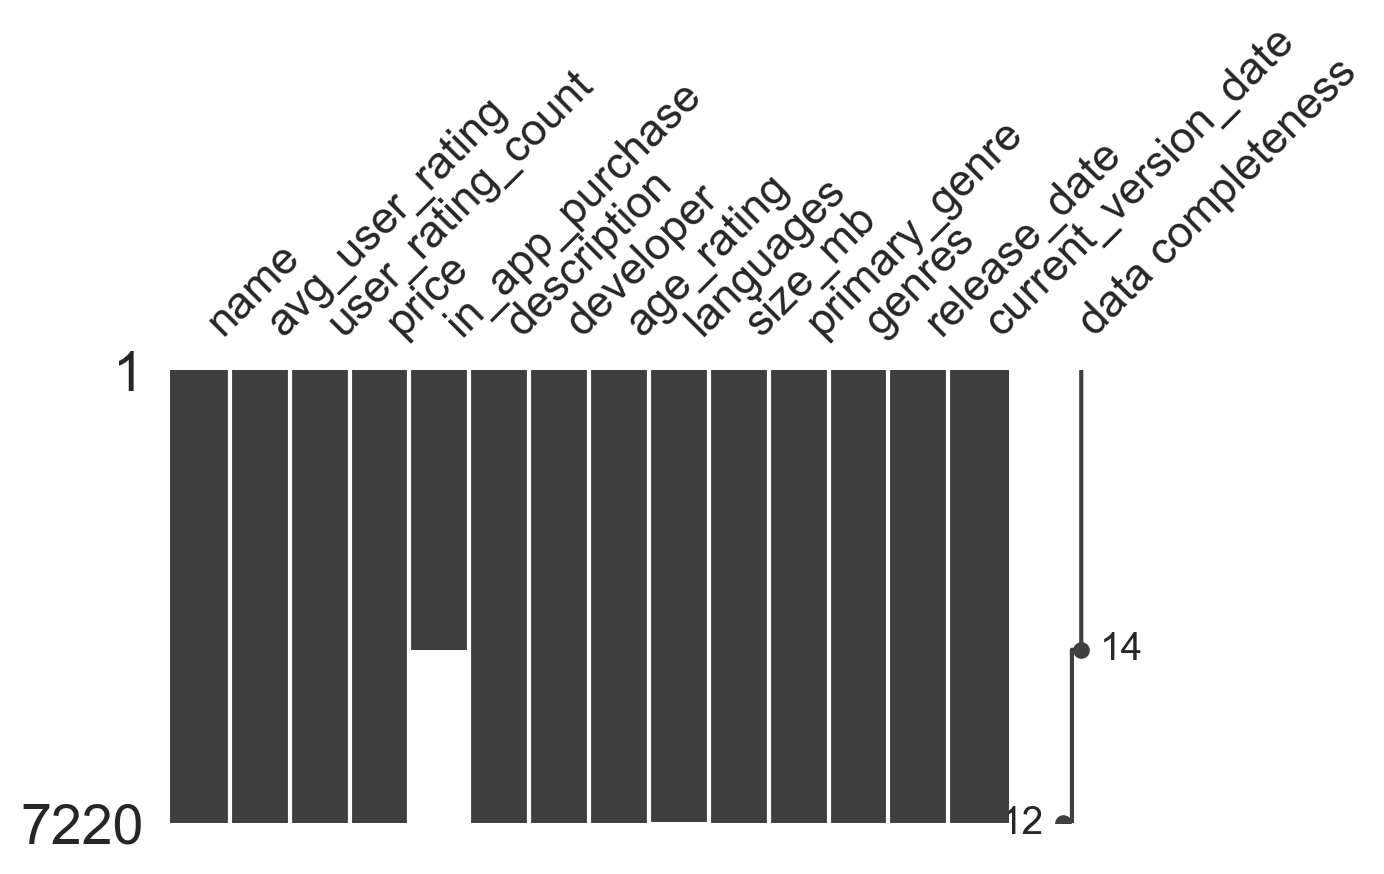

In [11]:
import missingno as msno

msno.matrix(games, labels=True, sort="descending",figsize=(6,3))
plt.show()

From the plot we can see that almost all missing values are from `in_app_purchase`, we can leave as it is.

<a id="analyze"></a>
## 5. Analyze and Share


### Question 1: What kind of strategy games are the most?

#### Genre
In the section of exploring the data, most strategy apps also belong to other game genres. What genres show up most frequently with strategy? Which age_rating is used the most? Let's get the relationships between genres and age_rating:

In [12]:
# get all values of age_rating
age_rating_list = games['age_rating'].unique().tolist()

# create a dataframe to display the relationships between genres and age_rating
genre_relationships = pd.DataFrame(index=games_genre_list, columns=age_rating_list)
genre_relationships.fillna(0, inplace=True)

# get the frequency
for row in games.itertuples():        
    genre_relationships.loc[row.genres, row.age_rating] += 1

genre_relationships

,4+,9+,12+,17+
Action,237,344,324,83
Adventure,169,96,59,11
Board,625,85,90,14
Card,220,58,54,11
Casino,10,0,15,2
Casual,363,91,41,18
Education,192,19,19,2
Family,235,39,5,1
Music,31,7,4,2
Puzzle,1135,101,61,26


Let's visualize their relationships by a heatmap.

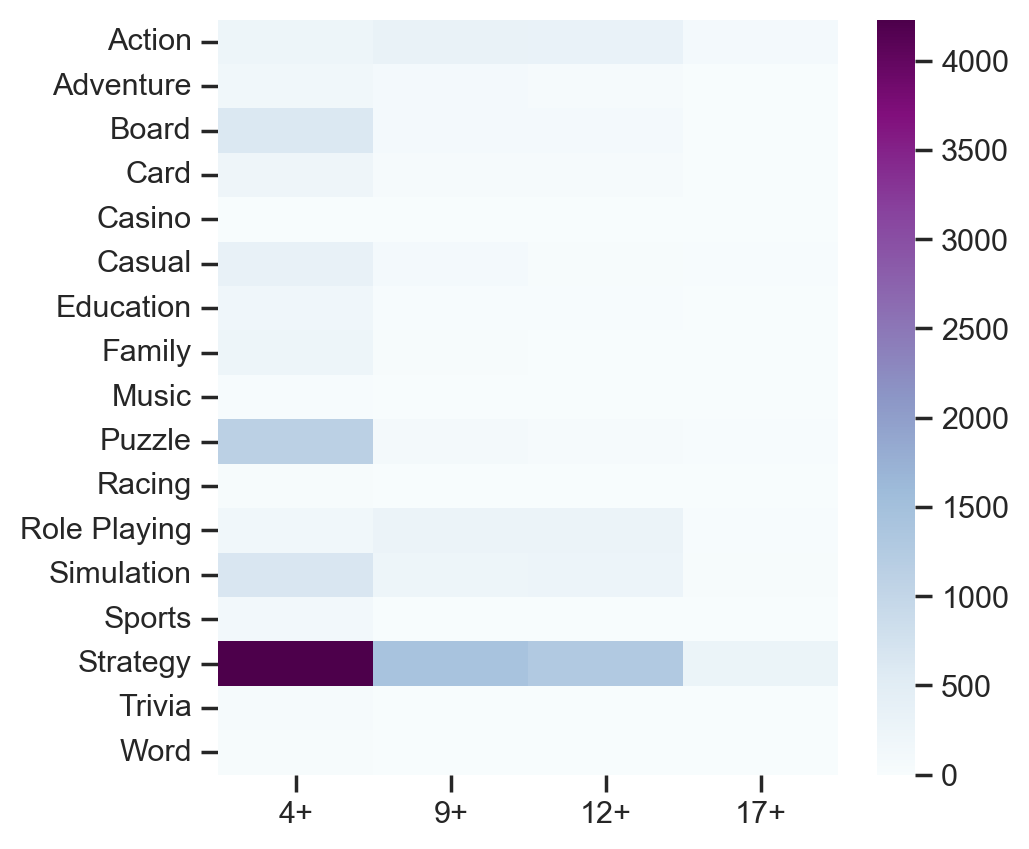

In [13]:
# create a heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(genre_relationships, cmap="BuPu")
plt.show()

As we can see from the heatmap, the most used genre is **Strategy**, which is normal since we're analyzing strategy games. For those multi-genres games, the most frequently show up genre is **Puzzle**, followed by Stimulation, while Casino, Music, Racing and Word have much lower frequency.

As for the age rating, **4+** is most common, but "17+" is least common.

#### Name

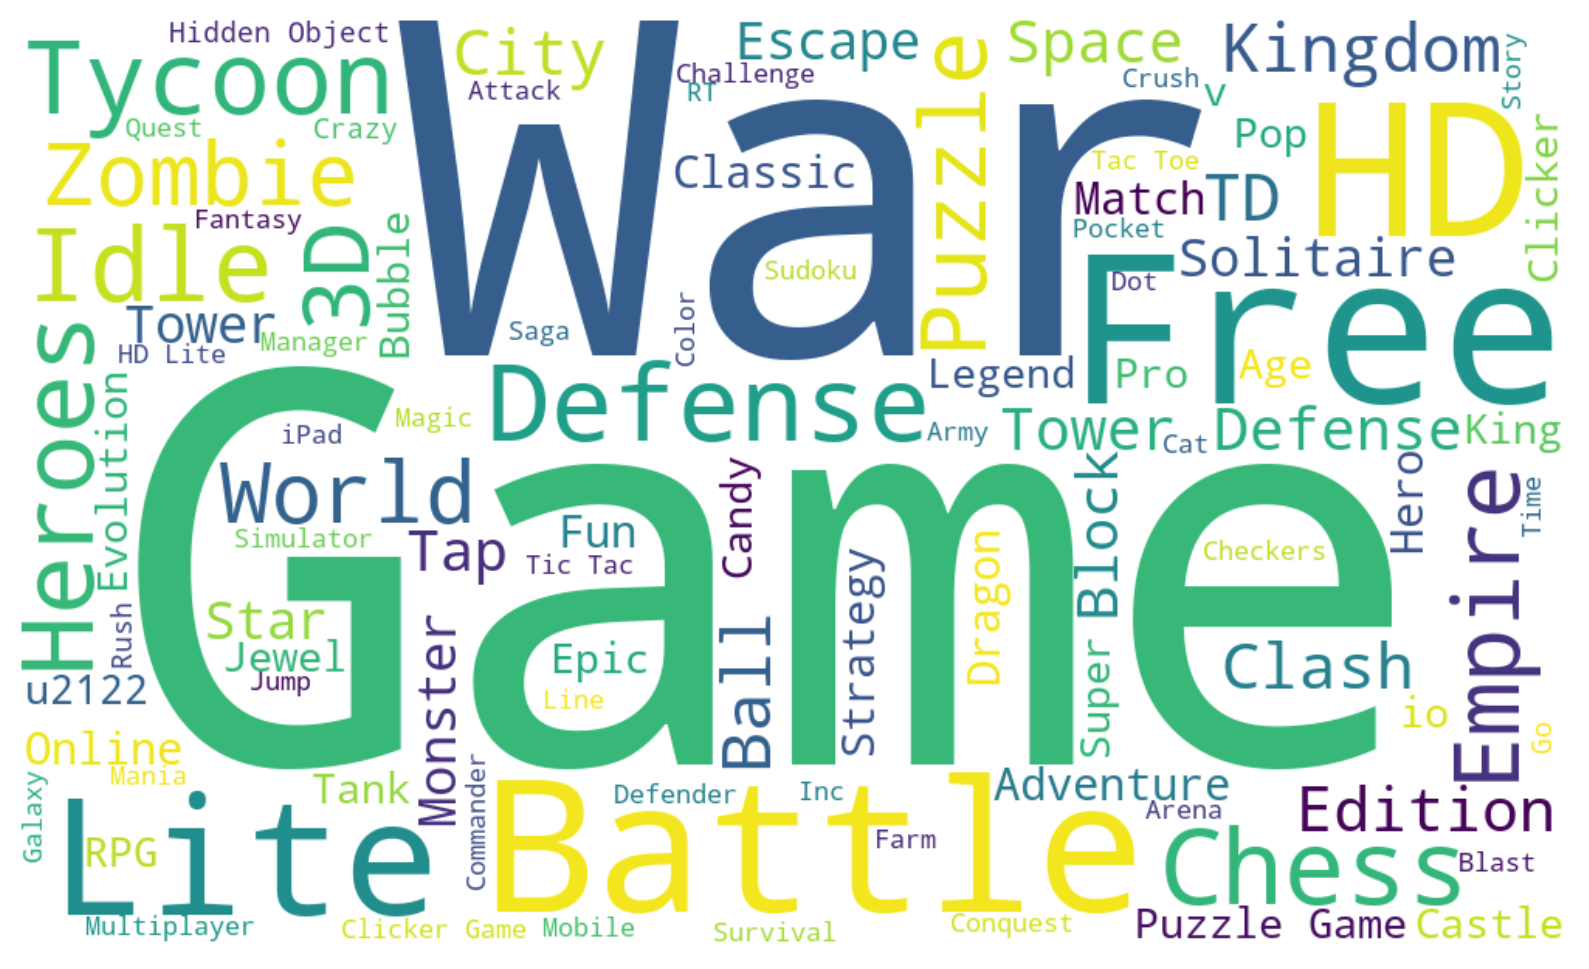

In [14]:
from wordcloud import WordCloud

wordcloud_name = WordCloud(width=1000, height=600,
                           max_words=100,
                           background_color='white'
                           ).generate(' '.join(games['name']))
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_name, interpolation="bilinear")
plt.axis("off")
plt.show()

The most often used names are "War", "Battle", and "Defense", which mean war is the most popular theme of strategy games. Many apps have features like "Free", "Lite" and "HD".

#### Price

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

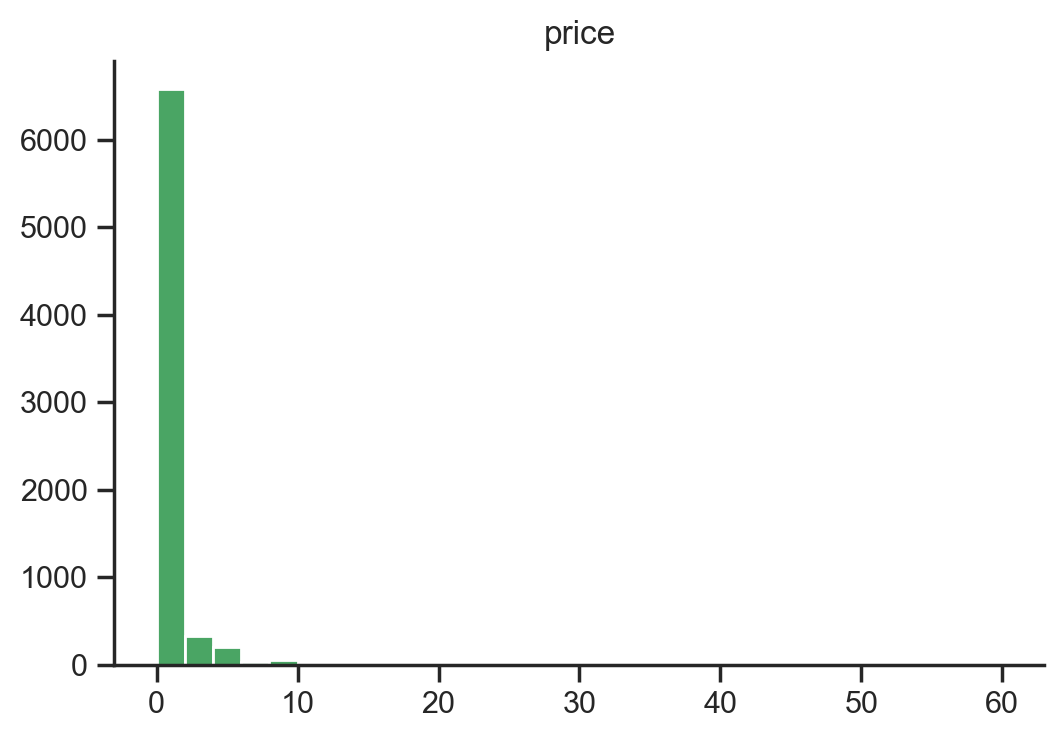

In [15]:
games.hist(column='price', bins=30, grid=False, figsize=(6,4), color='#4aa564')

The price is highly skewed, most games are less than $5. Let's take a closer look at the distribution below 5:

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

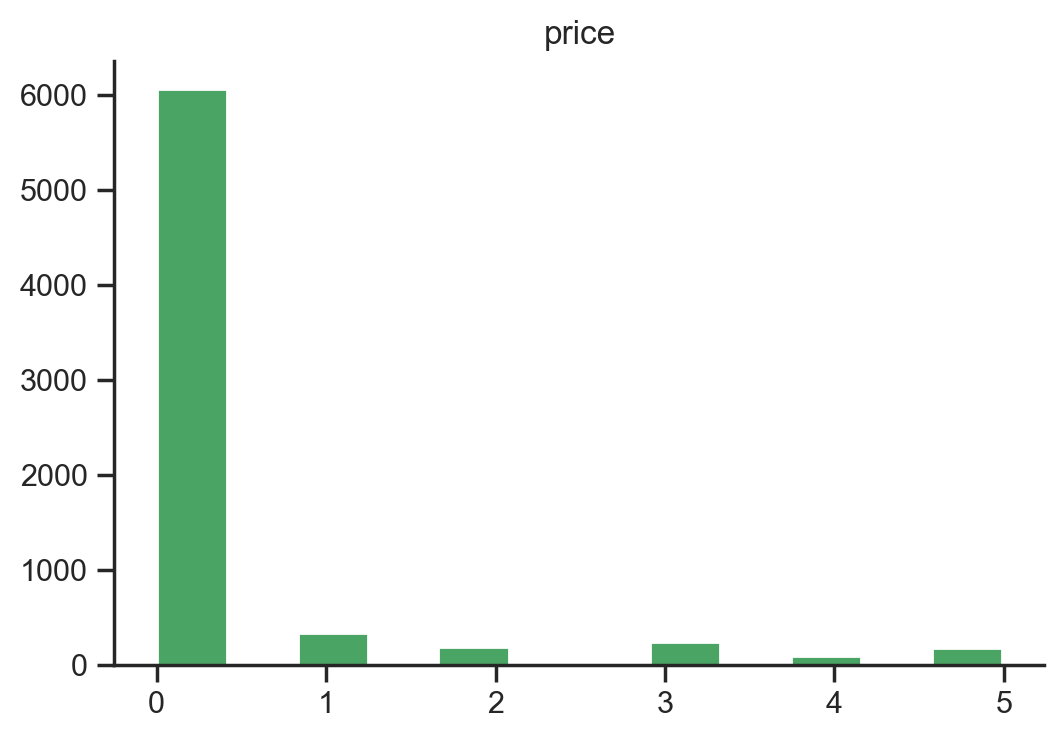

In [16]:
games[games['price'] <= 5].hist(column='price', bins=12, grid=False, figsize=(6,4), color='#4aa564')

Most games are free, and a small proportion is very close to $1. Let's divide the price to different groups, so we can use a pie chart to show their proportions:

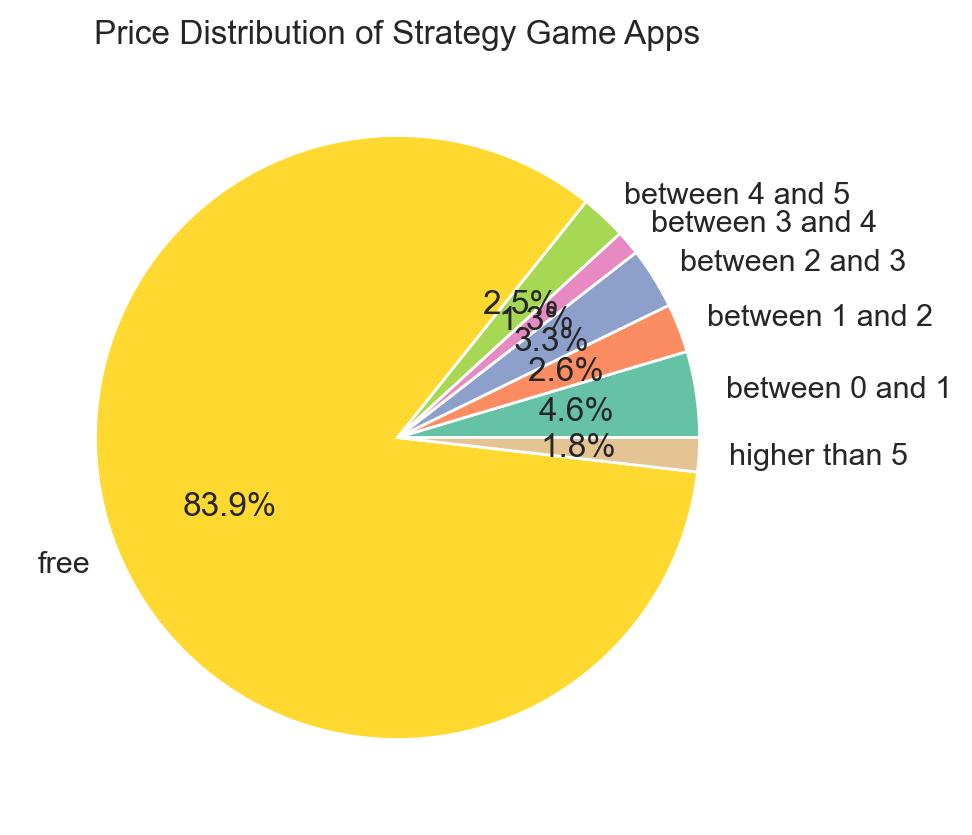

In [17]:
def get_price_group(price):
    if price == 0:
        return 'free'
    elif ((price > 0) & (price <= 1)):
        return 'between 0 and 1'
    elif ((price > 1) & (price <= 2)):
        return 'between 1 and 2'    
    elif ((price > 2) & (price <= 3)):
        return 'between 2 and 3'
    elif ((price > 3) & (price <= 4)):
        return 'between 3 and 4'
    elif ((price > 4) & (price <= 5)):
        return 'between 4 and 5'
    else:
        return 'higher than 5'
    
# Add column `price_group`
games['price_group'] = games['price'].apply(get_price_group)
counts = games.groupby('price_group').size()

# draw a pie chart
plt.figure(figsize=(5, 5))
palette_color = sns.color_palette('Set2')
plt.pie(counts.values, labels=counts.index, startangle=0, colors=palette_color, autopct='%1.1f%%')
plt.title('Price Distribution of Strategy Game Apps')
plt.show()

In [18]:
counts

price_group
between 0 and 1     332
between 1 and 2     189
between 2 and 3     237
between 3 and 4      95
between 4 and 5     177
free               6058
higher than 5       132
dtype: int64

Actually, some of free apps offer in app purchase, but the in app purchase have so many choices, it's inconvenient to group the free apps by those choices. So we keep free apps as one group.

To better understand the price distribution, we still need to calculate the percentage of those in app purchase apps.

In [19]:
iap_free_games_cnt = games[(games['price_group'] == 'free') & (games['in_app_purchase'].notna())].shape[0]
free_games_cnt = games[games['price_group'] == 'free'].shape[0]
iap_ratio = round(iap_free_games_cnt / free_games_cnt * 100, 1)
iap_ratio

67.9

As high as 67.9% of free apps offer in app purchase, i.e., 57% of total apps are free but may need you pay in app.

### Question 2: What kind of strategy games have the highest price?

In Question 1 we've known the frequency of each genre, but we don't know the average price of each genre. This time we will seperate games that have `Strategy` genre only, from multiple genres games.

#### Games with Highest Price

In [20]:
game_prices = pd.DataFrame(columns = ['avg_price'], index = [x for x in games_genre_list])
for g in games_genre_list:
    if g != 'Strategy': # apps with multiple genres
        mask = games['genres'].apply(lambda x: g in x)
    else: # apps with one genre `Strategy` only
        mask = games['genres'].apply(lambda x: g == ''.join(x))
    selected_genre_df = games[mask]
    count = selected_genre_df.shape[0]
    sum_price = selected_genre_df['price'].sum()
    avg_price = round(sum_price / count, 2)
    
    # add to the game_prices dataframe
    game_prices.loc[g] = [avg_price]
    
game_prices = game_prices.sort_values(by=['avg_price'], ascending=False)
game_prices

,avg_price
Board,1.25
Education,0.83
Card,0.73
Simulation,0.7
Role Playing,0.66
Adventure,0.57
Casino,0.41
Action,0.38
Puzzle,0.32
Sports,0.29


Its bar plot:

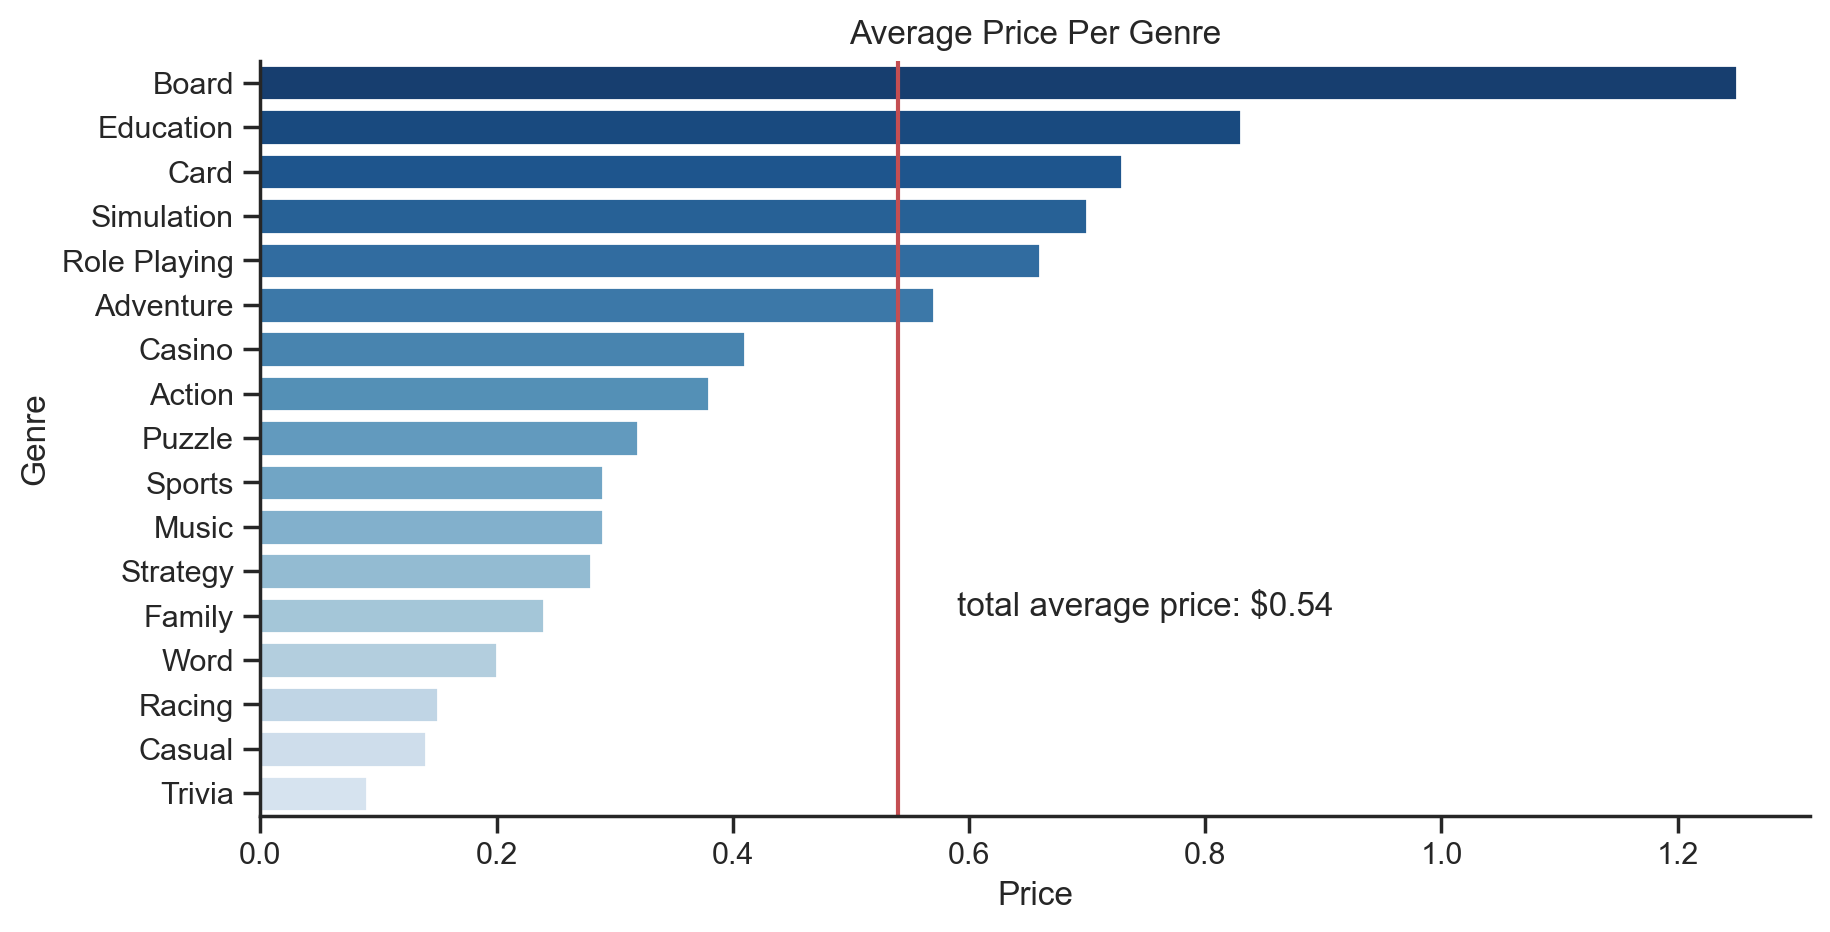

In [21]:
# get average price of all apps
avg_price = round(games['price'].mean(), 2)

# create a horizontal bar plot
palette = sns.color_palette("Blues",n_colors=20)
palette.reverse()
plt.figure(figsize=(10, 5))
sns.barplot(x='avg_price',
            y=game_prices.index,
            data=game_prices,
            palette=palette)
 
# create a vertical line to show the total average price
plt.axvline(x = avg_price, color = 'r')
plt.text(avg_price + 0.05, 12, f"total average price: ${avg_price}")
plt.xlabel('Price')
plt.ylabel('Genre')
plt.title("Average Price Per Genre")
plt.show()

Those games that belong to both strategy and **Board** have highest average price. The price of pure strategy games are lower than total average price.

### Question 3: What kind of strategy games have the highest rating?

#### User Rating vs. Genre

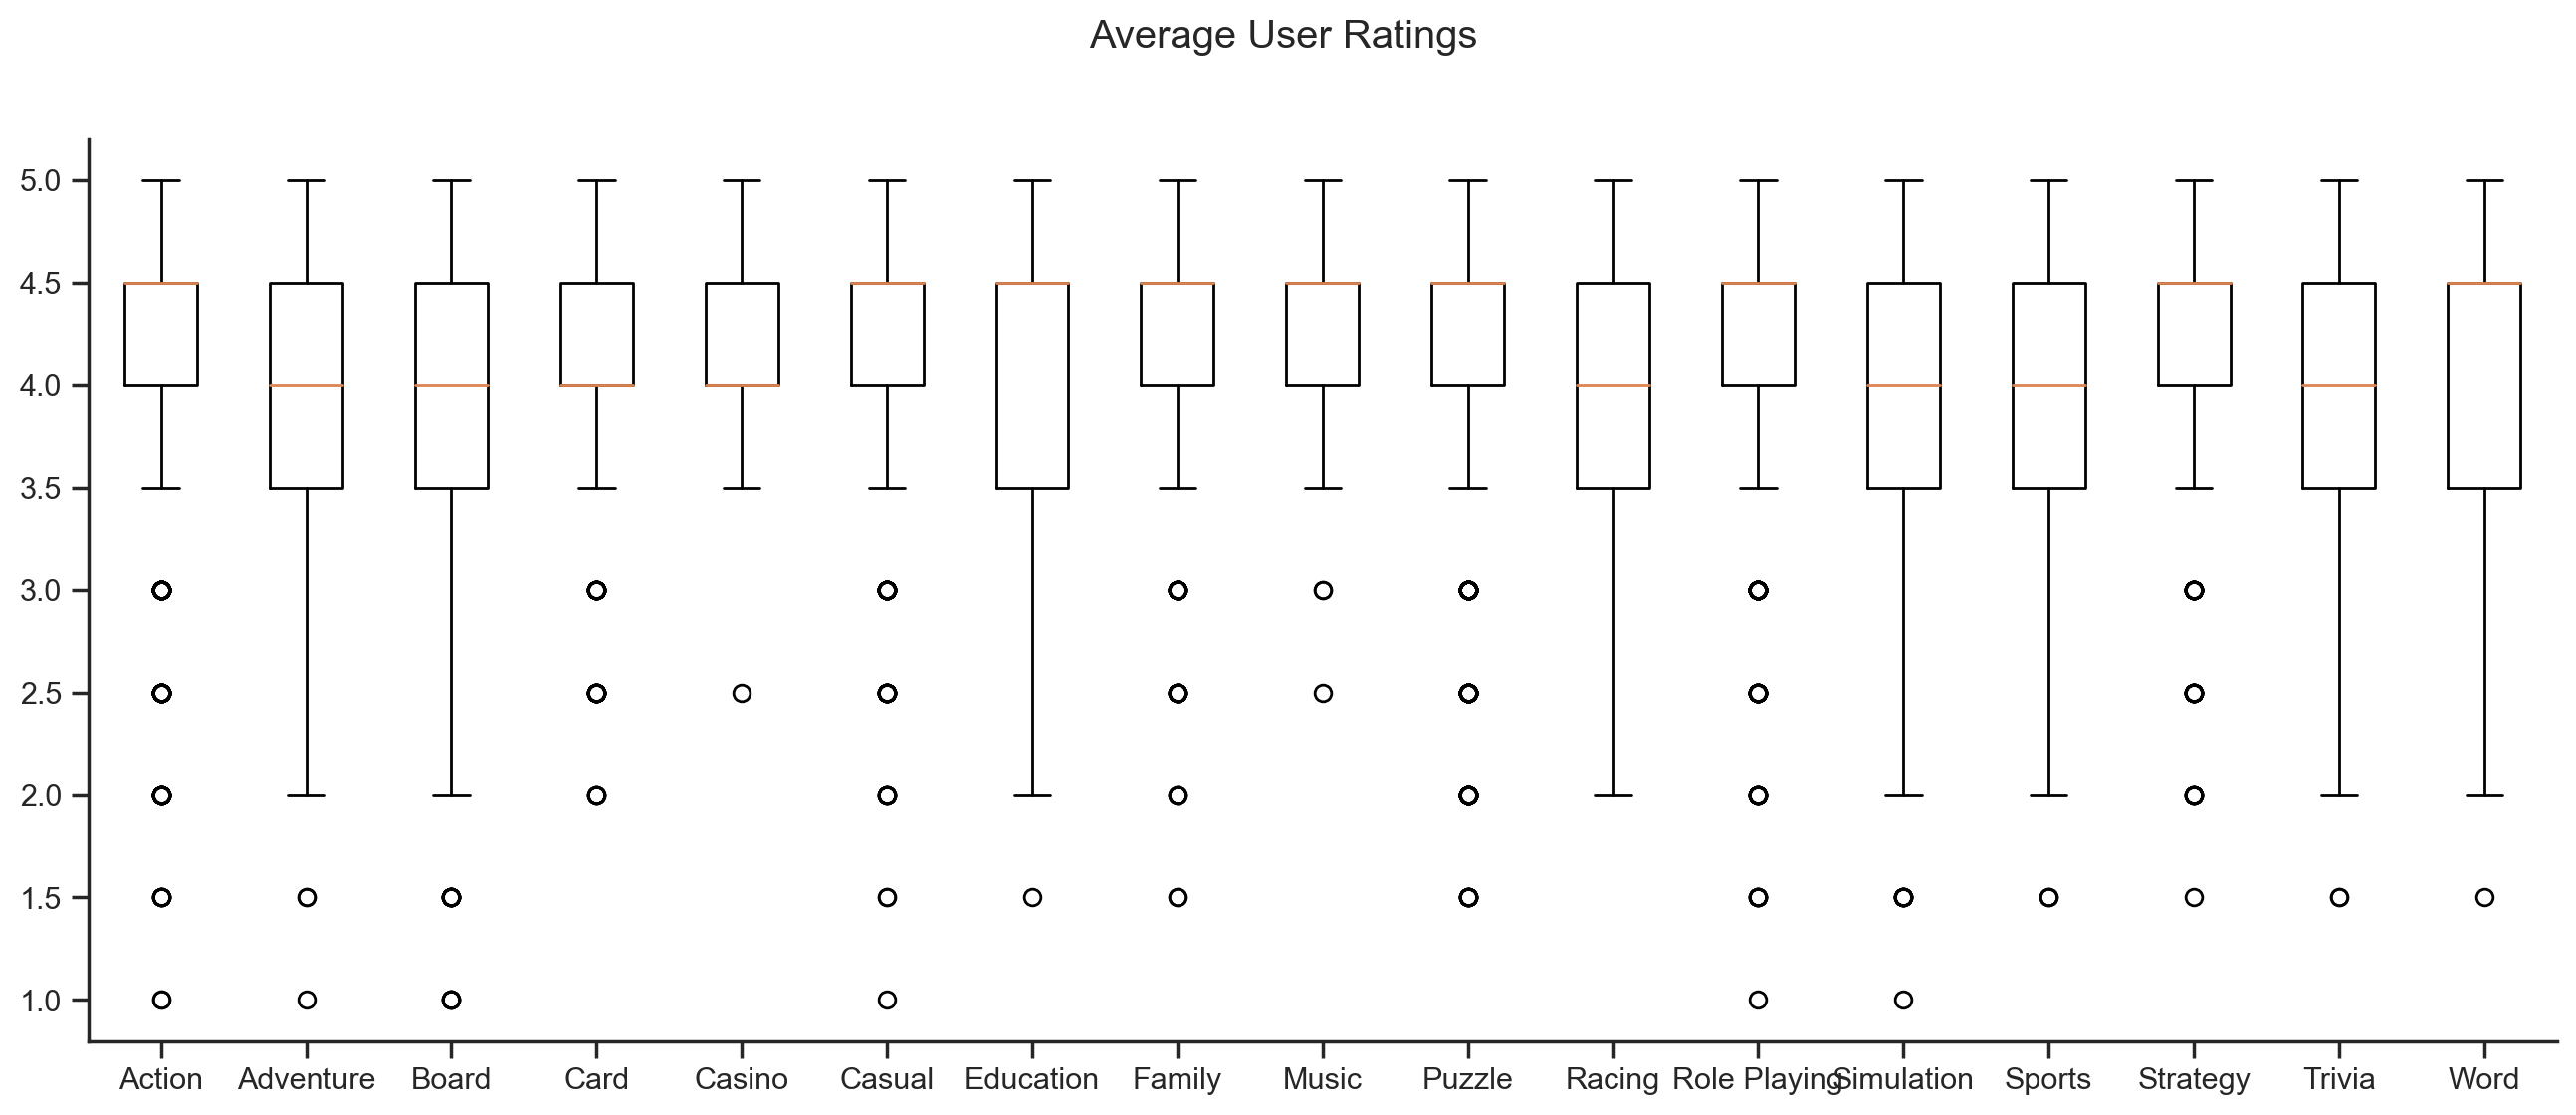

In [22]:
# get dictionary of each genre's ratings
ratings_dict = dict()
for g in games_genre_list:
    if g != 'Strategy': # apps with multiple genres
        mask = games['genres'].apply(lambda x: g in x)
    else: # apps with one genre `Strategy` only
        mask = games['genres'].apply(lambda x: g == ''.join(x))
    selected_genre_df = games[mask]
    ratings_dict[g] = selected_genre_df['avg_user_rating'].tolist()

# create boxplots
fig, ax = plt.subplots(figsize=(16,6))
ax.boxplot(ratings_dict.values())
ax.set_xticklabels(ratings_dict.keys())
fig.suptitle('Average User Ratings')
plt.show()

The max and 75th percentile of all genres look very similar, but the minimum ratings and the outliers lower the min values are different. Casino and Music have higher minimum average user ratings and less outliers, which means they have less "unhappy" customers, but that's normal, since in Question 1 we've known that they have much lower occurences than other genres.

If we ignore those outliers, and set highest median and minimum ratings as our goal. The following is the list of "well performed" genres, that is, all ratings are higher than 3.5 and half user ratings are higher than 4.5:

- Action
- Casual
- Family
- Music
- Puzzle
- Role Playing
- Strategy(as the only genre)

The following is the list of "under behaved" genres, that is, a 1/4 ratings are lower than 3.5, and minimum ratings are as low as 2.0:

- Adventure
- Board
- Education
- Racing
- Simulation
- Sports
- Trivia
- Word

Next, let's check if other features, like `price`, `age_rating` and `size`, may influence the average user rating.

#### User Rating vs. Price Group

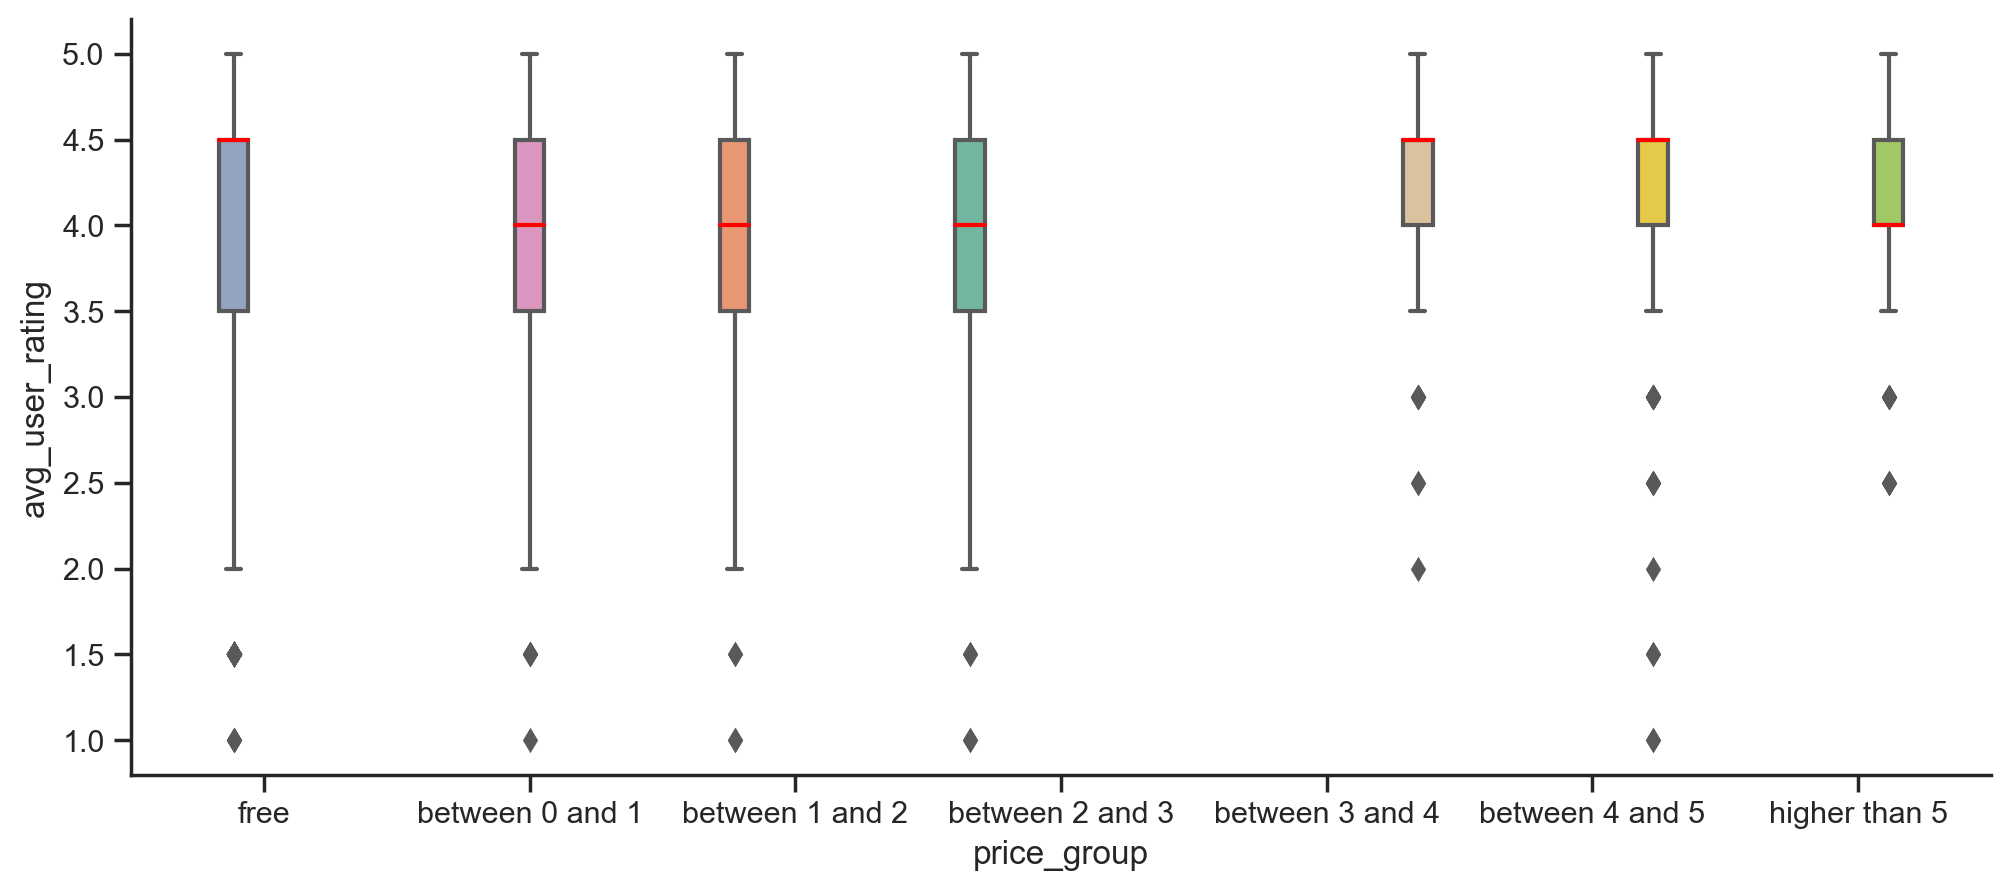

In [23]:
plt.figure(figsize=(12, 5))
sns.boxplot(y='avg_user_rating',
            x='price_group', 
            data=games,
            order = [
                'free',
                'between 0 and 1',
                'between 1 and 2',
                'between 2 and 3',
                'between 3 and 4',
                'between 4 and 5',
                'higher than 5'
            ],
            palette='Set2',
            medianprops=dict(color="red"),
            hue='price_group')
plt.legend([],[], frameon=False)
plt.show()

In general, apps whose prices are higher than `$3` have higher ratings, especially the apps between `$3-$5`, half the ratings are higher than 4.5, and their minimum ratings are still higher than 3.5. 
As for those lower than `$3`, their performances are similar and are not that good.

#### User Rating vs. Age Rating

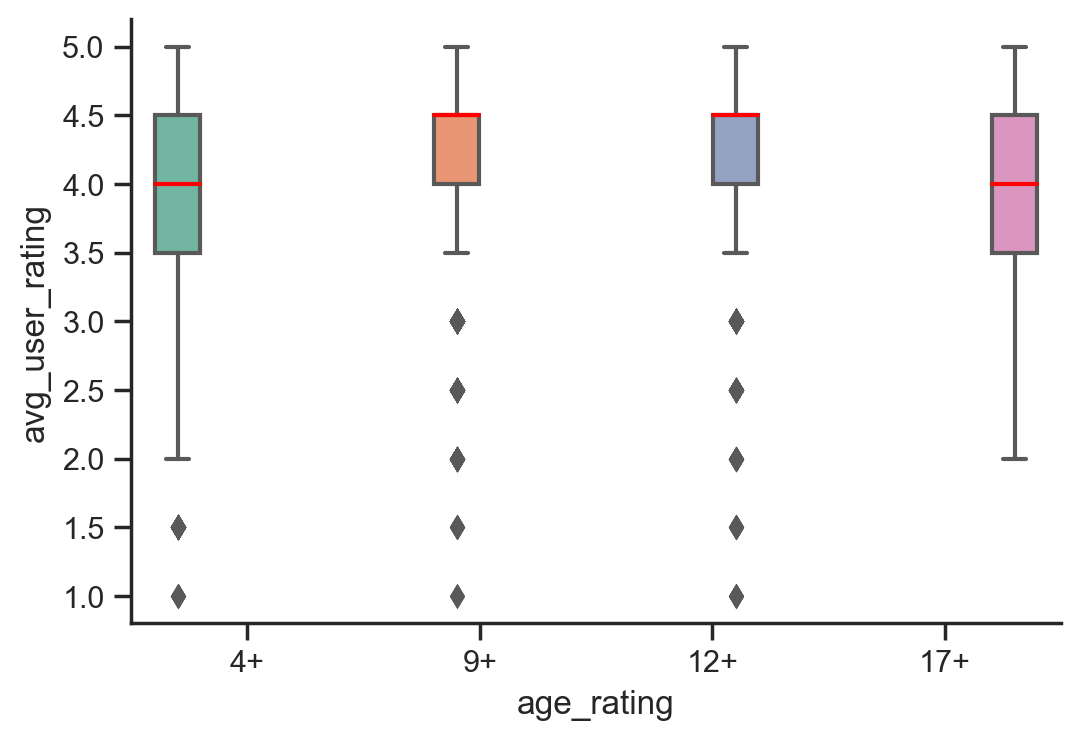

In [24]:
sns.boxplot(y='avg_user_rating', x='age_rating', 
                 data=games, 
                 palette='Set2',
                 medianprops=dict(color="red"),
                 hue='age_rating')
plt.legend([],[], frameon=False)
plt.show()

In general, users of apps with age rating "9+" and "12+" tend to give high ratings.

#### User Rating vs. Size of App

To group those apps by size, first of all, let's check its distribution by a histogram.

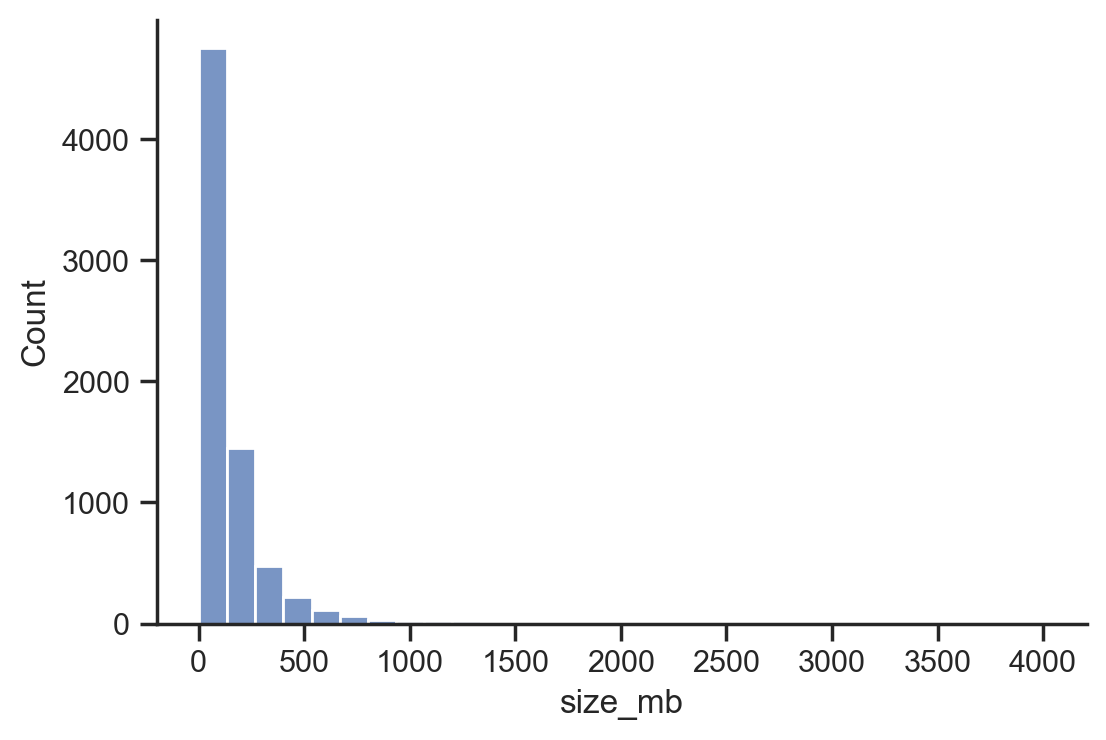

In [25]:
sns.histplot(data=games, x="size_mb", bins=30)
plt.show()

Based on its histogram, most apps are smaller than 125 MB. They can be divied into 4 groups:
- 0 - 125 MB
- 125 - 500 MB
- 500 MB - 1 GB
- Above 1 GB

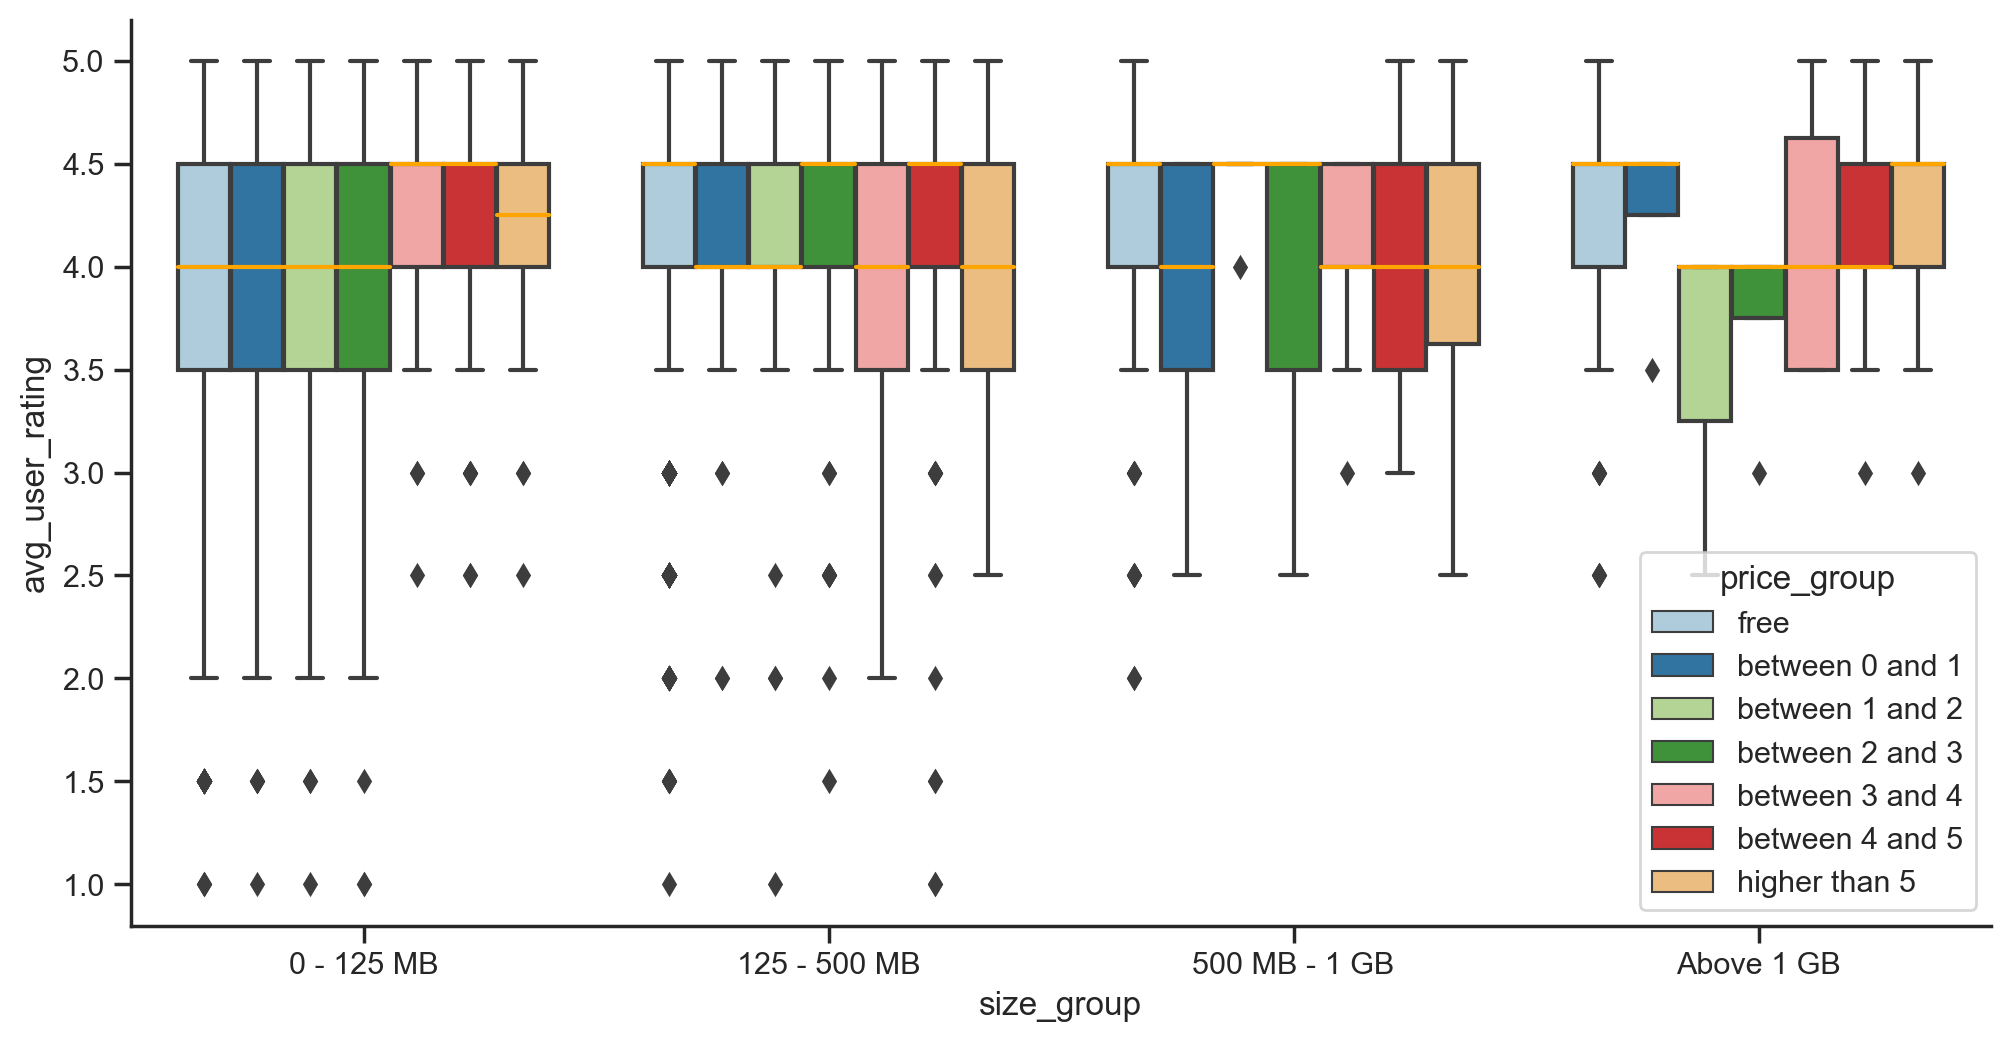

In [26]:
def get_size_group(size):
    if size <= 125:
        return '0 - 125 MB'
    elif ((size > 125) & (size <= 500)):
        return '125 - 500 MB'
    elif ((size > 500) & (size <= 1000)):
        return '500 MB - 1 GB'    
    else:
        return 'Above 1 GB'
    
# Add column `size_group` to the dataframe
games['size_group'] = games['size_mb'].apply(get_size_group)

# create a boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(y='avg_user_rating',
            x='size_group', 
            data=games,
            palette='Paired',
            hue='price_group',
            order = [
                '0 - 125 MB',
                '125 - 500 MB',
                '500 MB - 1 GB',
                'Above 1 GB'
            ],
            hue_order = [
                'free',
                'between 0 and 1',
                'between 1 and 2',
                'between 2 and 3',
                'between 3 and 4',
                'between 4 and 5',
                'higher than 5'
            ],            
            medianprops=dict(color="orange"))
plt.show()

What we can learn from above plot:
- for apps smaller than 125 MB, those more expensive than \\$3 have higher user ratings. 
- for apps 125 - 500 MB, those cheaper than \\$3 have higher user ratings.
- for apps 500 MB - 1 GB, those free apps have higher user ratings.
- for apps larger than 1 GB, those more expensive than \\$5 or free have higher user ratings.

### Question 4: Who are the main competitors?

First of all, we need to group the games by developer so we can know the number of games each developer created.

In [27]:
# grouped by developer
devs = games.groupby('developer')

# get number of apps per developer
devs_app_size = devs.size().sort_values(ascending=False)

# get average user ratings per developer
devs_user_rating = devs.agg(col_name=('avg_user_rating', 'mean'))

# merge them
devs_merged = pd.merge(devs_app_size.to_frame(), devs_user_rating, left_index = True, right_index = True)
devs_merged.reset_index(inplace=True)
devs_merged.columns = ['developer', 'app_count', 'avg_user_rating']
devs_merged

,developer,app_count,avg_user_rating
0,Tapps Tecnologia da Informa\xe7\xe3o Ltda.,113,4.424779
1,Detention Apps,38,4.447368
2,Qumaron,36,3.666667
3,EASY Inc.,35,3.985714
4,HexWar Games Ltd,32,3.390625
...,...,...,...
4074,Infivention Inc.,1,3.500000
4075,Injoylabs Pty. Ltd.,1,4.500000
4076,Inkcadre Inc,1,4.500000
4077,Inner Hero LLC,1,4.500000


The developer that created most number of apps has a strange name "Tapps Tecnologia da Informa\xe7\xe3o Ltda", which might blame to special characters. After searching online, we can find its correct name "Tapps Tecnologia da Informação Ltda".

In [28]:
devs_merged.at[0, 'developer'] = 'Tapps Tecnologia da Informação Ltda'

Here we define competitors as developers who have created most apps. and still have average user rating higher than 4.0, let's get the top 10 list.

In [29]:
# get the competitors
competitors = devs_merged[devs_merged['avg_user_rating'] > 4].reset_index(drop=True)
competitors.head(10)

,developer,app_count,avg_user_rating
0,Tapps Tecnologia da Informação Ltda,113,4.424779
1,Detention Apps,38,4.447368
2,"Kairosoft Co.,Ltd",21,4.333333
3,Evolution Games GmbH,21,4.690476
4,Psycho Bear Studios,19,4.289474
5,Flipline Studios,19,4.526316
6,Romit Dodhia,18,4.444444
7,MOBIRIX,18,4.250000
8,Chen Yong Min,18,4.750000
9,Ninja Kiwi,17,4.294118


<a id="summary"></a>
## 6. Summary & Recommendations

### Summary
**Most Common**:

- Genre: Games that belong to both Strategy and Puzzle.
- Age Rating: Games whose age rating are "4+".
- Price: Games that are free but offer in app purchase.
- Name: Games whose names contain themes like "War", "Battle" or features like "Free", "Lite" and "HD".
- Size: Below 125 MB.

**Highest Price**:

- Games that belong to both Strategy and Board have highest average price, but the price of pure strategy games are lower than total average price.

**Highest Rating**

- Genre: Action, Casual, Family, Music, Puzzle, Role Playing, and Strategy alone, have all ratings >= 3.5 and 50% of ratings higher than 4.5.
- Age Rating: "9+" and "12+"
- Price: Between \\$3 - \$5
- Size: 
    - Below 125 MB: Price higher than \\$3 
    - 125 - 500 MB: Price lower than \\$3
    - Above 500 MB: Free apps  
    
### Recommendations

- For less competition, creating Action\Casual\Family\Music\Role Playing games, those genres also tend to have high user ratings.
- Focus on apps smaller than 125 MB, between \\$3 and \$5, and have "9+" or "12+" age rating.
- Take a case study of Tecnologia da Informação Ltda and find out why it is so productive and has a high user rating.